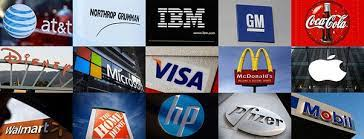

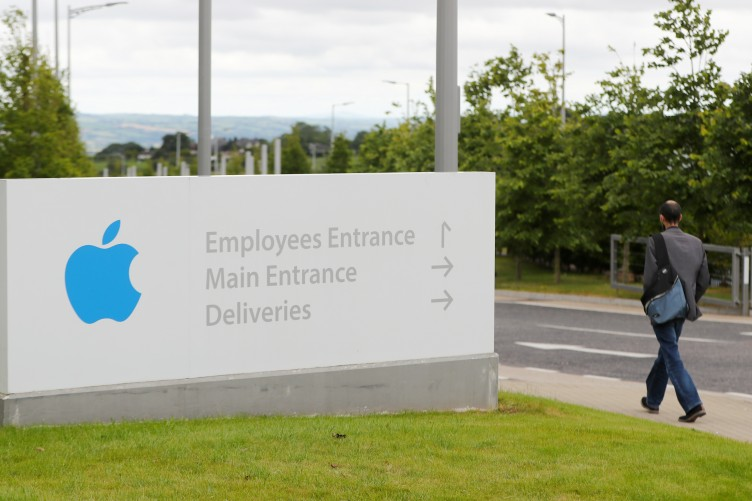

## Stock Market Analysis  & Prediction of stocks uisng Long Short Term Memeory [LSTM] 📑💹🔛

# 

# 

# 

#  💵💸 Introduction:

# 

# 🔑 Key Important concepts to remeber ! 

# 

# 

#  1} Time Series : >  Series of data point collected over a user defined time period .


> example : Tempertaure recorded of a city  daily !. Each day  temp recorded at specific time,and the collection of thies temp. reading forms a time series .


the  analyis of time sereis data can provide valuable insights for various  applicaions 

* The time series data  is everywhere ,so manipulating them is important for any data analysis& data scientist.

# 🧾 Analysis : 

In [1]:



# We will get our stock data from the Yahoo Finance website. 
#Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. 
#To get the data from Yahoo Finance, we will be using yfinance library.

 # | 1 |  Data Importing / Loading

In [2]:
#  Step 1: Installing the  library:

 # !pip install -q yfinance

In [3]:

import yfinance as yf




import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for time stamp 

from datetime import datetime

In [4]:
# Step 2: Define the Ticker Symbol and Time Range:


#ticker Symbol

ticker_symbol='AAPL'

# Time range 

start_date='2018-06-01'
end_date='2023-06-01'

In [5]:
#Step 3: Retrieve Stock Data from Yahoo Finance




df=yf.download(ticker_symbol,start=start_date,end=end_date)                                                       #Use the yf.download() function from the yfinance library to retrieve the stock data


[*********************100%***********************]  1 of 1 completed


In [6]:
# Step 4: Save the Data as a CSV File


file_path='C:\\Users\\dell\\Lets Grow More Internship\\Task- 3\\stock_data.csv'
df.to_csv(file_path)


In [7]:
df.shape

(1258, 6)

In [8]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-01   46.997501   47.564999   46.937500   47.560001   45.451916   
2018-06-04   47.910000   48.355000   47.837502   47.957500   45.831799   
2018-06-05   48.267502   48.485001   48.090000   48.327499   46.185394   
2018-06-06   48.407501   48.520000   47.980000   48.494999   46.345486   
2018-06-07   48.535000   48.549999   48.084999   48.365002   46.221245   
...                ...         ...         ...         ...         ...   
2023-05-24  171.089996  172.419998  170.520004  171.839996  171.839996   
2023-05-25  172.410004  173.899994  171.690002  172.990005  172.990005   
2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   
2023-05-30  176.960007  178.990005  176.570007  177.300003  177.300003   
2023-05-31  177.330002  179.350006  176.759995  177.250000  177.250000   

               Volume  
Date                   
2018-06-01   93770000  
2018-06-04  105064800  
2018-06-05   86264000  
2018-06-06   83734400  
2018-06-07   85388800  
...               ...  
2023-05-24   45143500  
2023-05-25   56058300  
2023-05-26   54835000  
2023-05-30   55964400  
2023-05-31   99625300  

[1258 rows x 6 columns]

In [9]:
df.head(5)

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-06-01  46.997501  47.564999  46.937500  47.560001  45.451916   93770000
2018-06-04  47.910000  48.355000  47.837502  47.957500  45.831799  105064800
2018-06-05  48.267502  48.485001  48.090000  48.327499  46.185394   86264000
2018-06-06  48.407501  48.520000  47.980000  48.494999  46.345486   83734400
2018-06-07  48.535000  48.549999  48.084999  48.365002  46.221245   85388800

In [10]:
df.tail(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-24  171.089996  172.419998  170.520004  171.839996  171.839996   
2023-05-25  172.410004  173.899994  171.690002  172.990005  172.990005   
2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   
2023-05-30  176.960007  178.990005  176.570007  177.300003  177.300003   
2023-05-31  177.330002  179.350006  176.759995  177.250000  177.250000   

              Volume  
Date                  
2023-05-24  45143500  
2023-05-25  56058300  
2023-05-26  54835000  
2023-05-30  55964400  
2023-05-31  99625300

 see complete list :

In [11]:
# step 5 : See complete list :


from IPython.core.display import display,HTML


def show_all(df):
     with pd.option_context('display.max_row',None,'display.max_columns',None,'display.width',None):
            display(HTML(df.to_html()))



In [12]:
show_all(df)

In [13]:
df.head(5)

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-06-01  46.997501  47.564999  46.937500  47.560001  45.451916   93770000
2018-06-04  47.910000  48.355000  47.837502  47.957500  45.831799  105064800
2018-06-05  48.267502  48.485001  48.090000  48.327499  46.185394   86264000
2018-06-06  48.407501  48.520000  47.980000  48.494999  46.345486   83734400
2018-06-07  48.535000  48.549999  48.084999  48.365002  46.221245   85388800

# Imp Note **

   Reviewing our data of Apple Inc. Stock data of last 6 months we can say following things :
 
 
 >.  The data having  6 columns and 1258 rows.
 
 >.  The Date is  Index of the data
 
 >.   All data is in numerical form.
 
 >.    Data frmae having different attributes related to Stock price :Opne,High,Low,Close, Adj Close, Volume  etc..
 
 >.   Thre are some gaps in days including  saturday and sunday and any other pubilc holidays.
 
 
 >. We will prefere Adj close values as our targeted  attribute for our data analsysi over the close value .
    because t's generally recommended to use adjusted close prices rather than close prices.
    The adjusted close price takes into account factors such as dividends, stock splits, and other corporate actions that can       affect the stock's price.
 

# Stock prices of Apple Inc. from June 2018 to 31 June 2023 ( 6 years ) Saved in th datafrmae df , and now we can see this  here some  Quick details about our data . ✅

# |2| General Descriptive statistics analysis 
    

In [14]:
# Central Tendency, Dispersion , mean,Standerd devation ,count.... etc 






In [15]:
df.head(5)

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-06-01  46.997501  47.564999  46.937500  47.560001  45.451916   93770000
2018-06-04  47.910000  48.355000  47.837502  47.957500  45.831799  105064800
2018-06-05  48.267502  48.485001  48.090000  48.327499  46.185394   86264000
2018-06-06  48.407501  48.520000  47.980000  48.494999  46.345486   83734400
2018-06-07  48.535000  48.549999  48.084999  48.365002  46.221245   85388800

In [16]:
df.tail(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-24  171.089996  172.419998  170.520004  171.839996  171.839996   
2023-05-25  172.410004  173.899994  171.690002  172.990005  172.990005   
2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   
2023-05-30  176.960007  178.990005  176.570007  177.300003  177.300003   
2023-05-31  177.330002  179.350006  176.759995  177.250000  177.250000   

              Volume  
Date                  
2023-05-24  45143500  
2023-05-25  56058300  
2023-05-26  54835000  
2023-05-30  55964400  
2023-05-31  99625300

In [17]:
df.shape

(1258, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-06-01 to 2023-05-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [19]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    107.242460   108.540557   106.030940   107.347136   105.942524   
std      45.844031    46.400430    45.315860    45.884330    46.170716   
min      35.994999    36.430000    35.500000    35.547501    34.209957   
25%      55.541249    56.061874    54.876250    55.684999    53.667747   
50%     121.005001   122.965000   119.535000   121.094997   119.405548   
75%     148.002499   149.440002   146.455002   148.172501   147.175568   
max     182.630005   182.940002   179.119995   182.009995   180.434280   

             Volume  
count  1.258000e+03  
mean   1.107432e+08  
std    5.460185e+07  
min    3.519590e+07  
25%    7.510060e+07  
50%    9.596820e+07  
75%    1.297685e+08  
max    4.265100e+08

In [20]:
df.shape

(1258, 6)

In [21]:
df.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999679  0.999614  0.999174   0.999122 -0.381410
High       0.999679  1.000000  0.999548  0.999612   0.999565 -0.374358
Low        0.999614  0.999548  1.000000  0.999624   0.999581 -0.390530
Close      0.999174  0.999612  0.999624  1.000000   0.999952 -0.382899
Adj Close  0.999122  0.999565  0.999581  0.999952   1.000000 -0.384420
Volume    -0.381410 -0.374358 -0.390530 -0.382899  -0.384420  1.000000

# 3 | Data preprocessing :



NULL Check 🏁

Duplicates Check 🏁

Skewness Check 🏁

Outliers Check 🏁

Scaling Check 🏁

Categorical Data Encoding Check 🏁

In [22]:
#3.1.Null check .

df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:title={'center':'Null Value Visualization in Apple Inc. Stocks'}, ylabel='Date'>

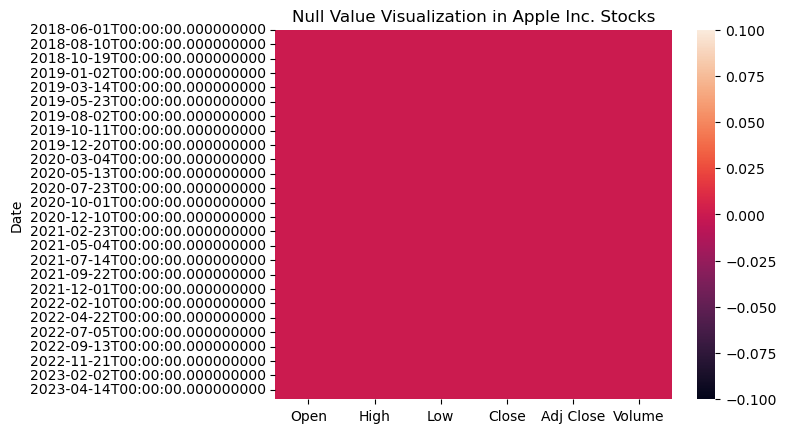

In [23]:
plt.title("Null Value Visualization in Apple Inc. Stocks")
sns.heatmap(df.isnull())


# No Null values   Detetcted : ✅

In [24]:
# 3.2. Dupicates :

df.drop_duplicates(keep='last',inplace=False)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-01   46.997501   47.564999   46.937500   47.560001   45.451916   
2018-06-04   47.910000   48.355000   47.837502   47.957500   45.831799   
2018-06-05   48.267502   48.485001   48.090000   48.327499   46.185394   
2018-06-06   48.407501   48.520000   47.980000   48.494999   46.345486   
2018-06-07   48.535000   48.549999   48.084999   48.365002   46.221245   
...                ...         ...         ...         ...         ...   
2023-05-24  171.089996  172.419998  170.520004  171.839996  171.839996   
2023-05-25  172.410004  173.899994  171.690002  172.990005  172.990005   
2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   
2023-05-30  176.960007  178.990005  176.570007  177.300003  177.300003   
2023-05-31  177.330002  179.350006  176.759995  177.250000  177.250000   

               Volume  
Date                   
2018-06-01   93770000  
2018-06-04  105064800  
2018-06-05   86264000  
2018-06-06   83734400  
2018-06-07   85388800  
...               ...  
2023-05-24   45143500  
2023-05-25   56058300  
2023-05-26   54835000  
2023-05-30   55964400  
2023-05-31   99625300  

[1258 rows x 6 columns]

# No duplicate values found ✅

In [25]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
# 3.3 Skevness  check:

skewness=df['Adj Close'].skew()

In [27]:
print("skewnesss:",skewness)

skewnesss: -0.12402880486441904


In [28]:
#Based on the skewness value of -0.124, it indicates a slight left-skewness in the distribution of your stock price data. This means that the distribution has a longer left tail and relatively fewer extreme values on the left side.

#A negative skewness suggests that there may be more frequent small increases or occasional large decreases in stock prices. However, it is important to note that a skewness value close to zero (-0.124 is relatively small) indicates that the skewness is not significantly pronounced.

G:\anaconda\new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

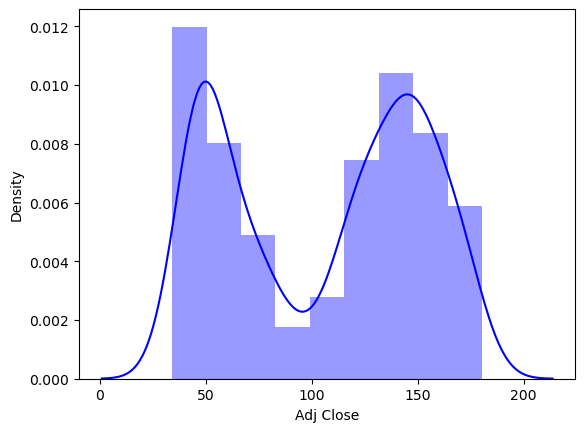

In [29]:
sns.distplot(df['Adj Close'],color='b')

Text(0.5, 1.0, 'Adj Close')

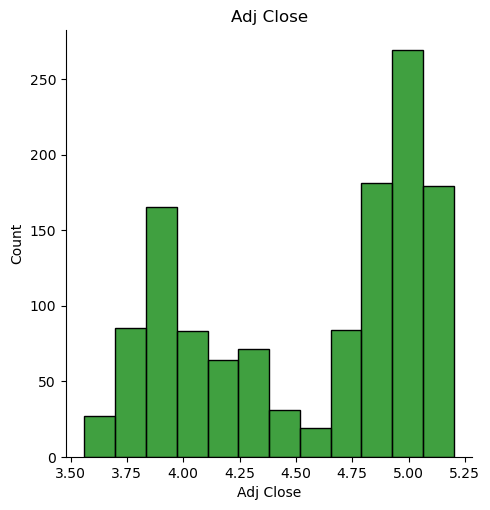

In [30]:
SingleLog_y=np.log1p(df['Adj Close'])
sns.displot(SingleLog_y,color='g')
plt.title('Adj Close')


In [31]:
print("skew after 1st Log Transform: %f" % SingleLog_y.skew())

skew after 1st Log Transform: -0.416793


 # skewness Not affected :✅

<AxesSubplot:title={'center':' Outliers  visualization in Volume attribute'}>

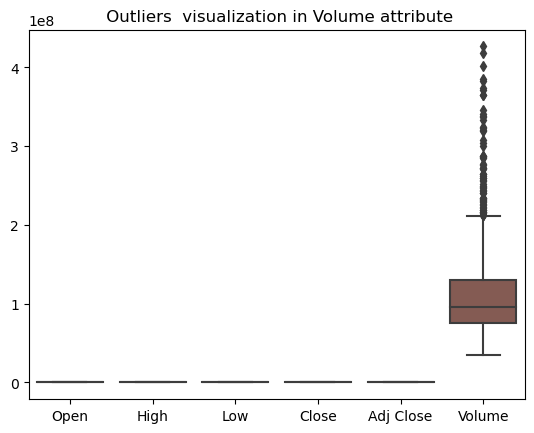

In [32]:
#3.4 Outliers :

plt.title(" Outliers  visualization in Volume attribute")
sns.boxplot(data=df)

Text(0.5, 1.0, 'Apple Inc.stocks  volume')

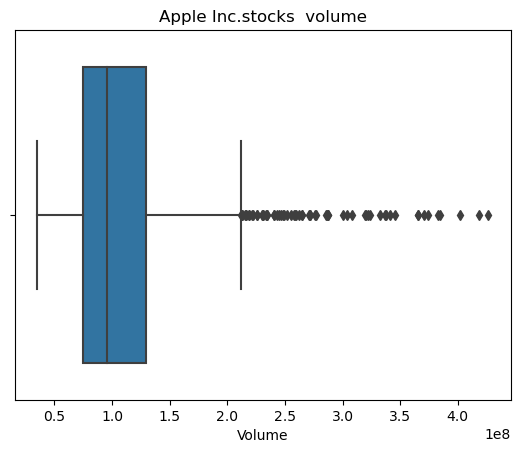

In [33]:
 # Close look to the Volume attribute :
    

sns.boxplot(data=df,x=df['Volume'])
plt.title("Apple Inc.stocks  volume")

In [34]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


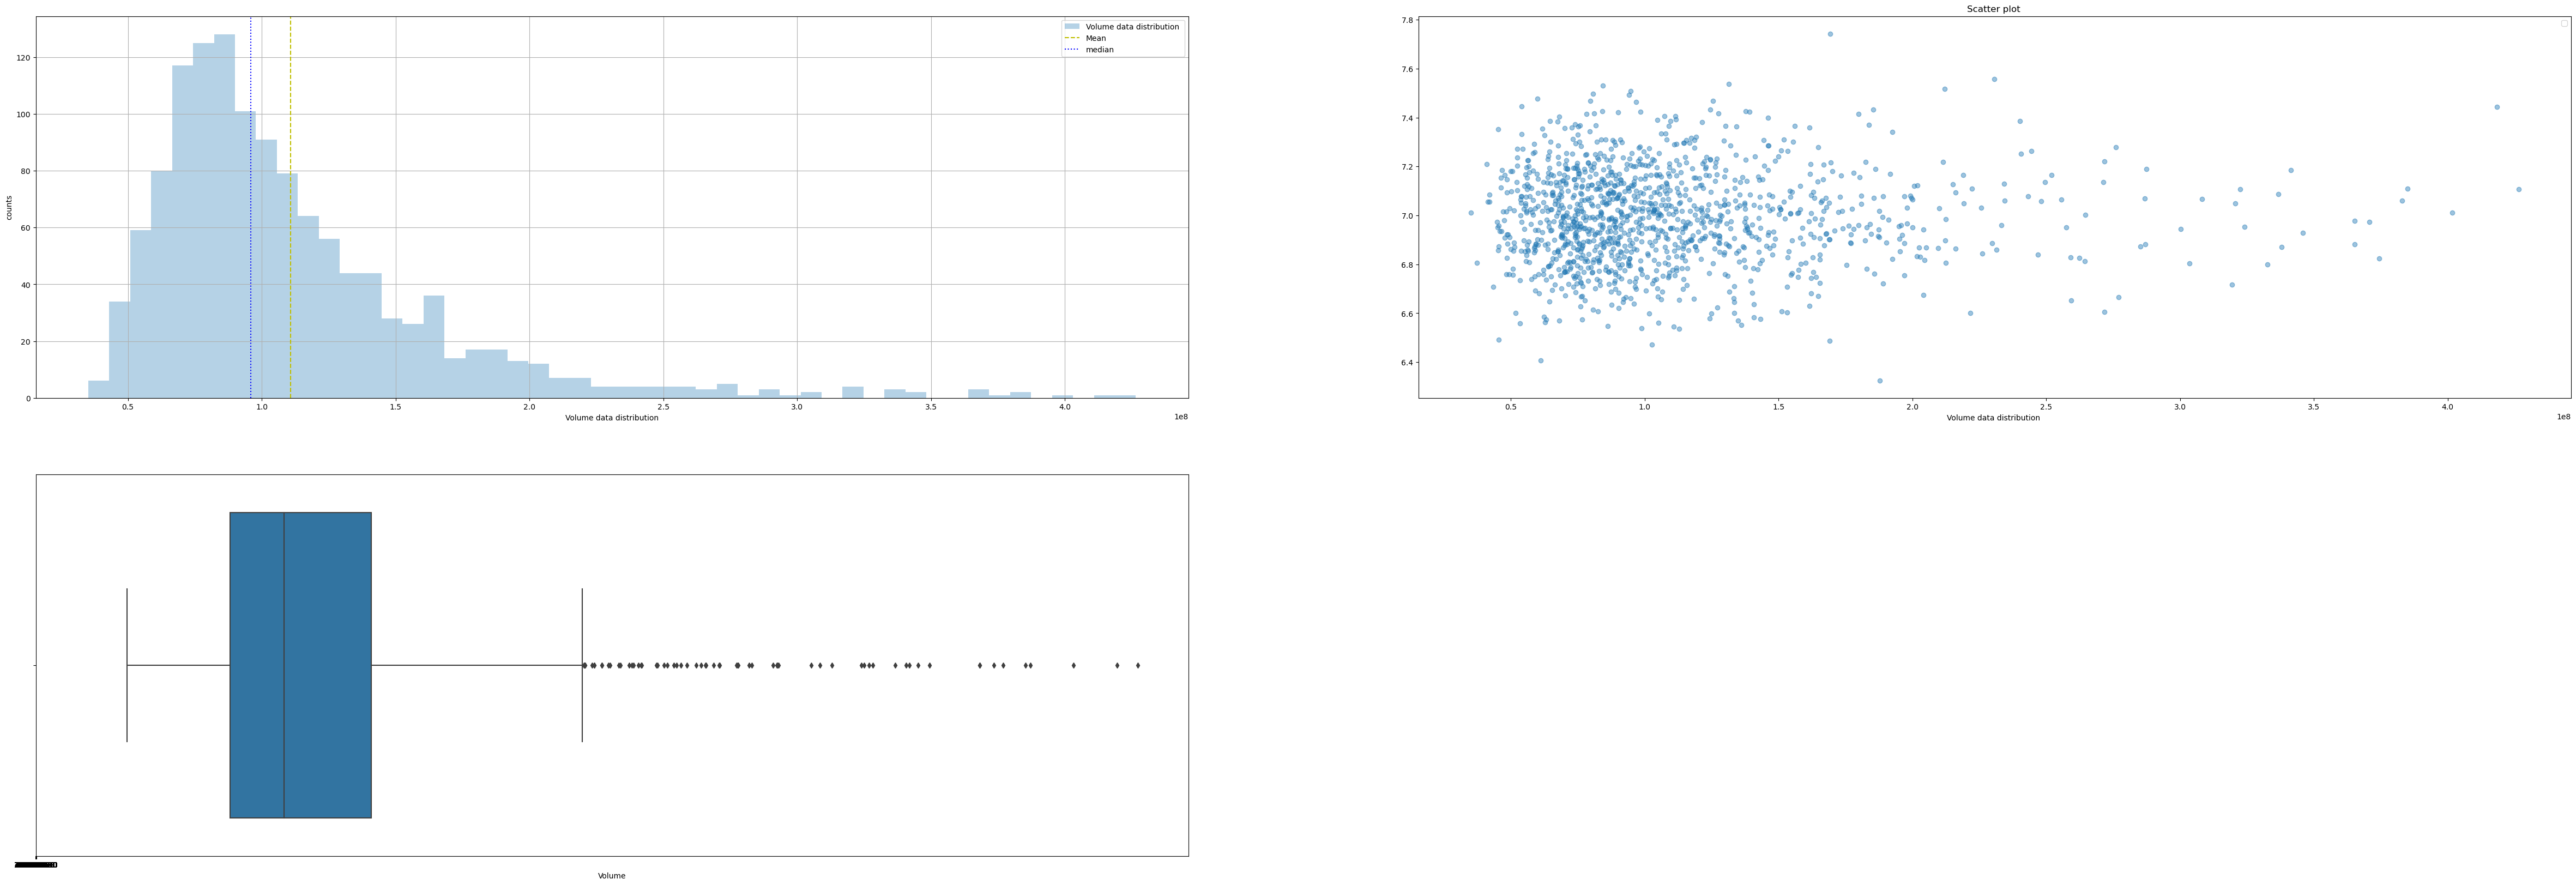

In [35]:
# ploting graphs to understand various details of our data point :


plt.figure(figsize=(60,20),facecolor='white',edgecolor='white',num=10)


plt.subplot(2,2,1)
df['Volume'].hist(bins=50,label='Volume data distribution ',alpha=0.33)
plt.axvline(np.mean(df['Volume']),ls='--',c='y',label="Mean")
plt.axvline(np.median(df['Volume']),ls=':',c='b',label="median")


plt.ylabel('counts')
plt.xlabel('Volume data distribution')
plt.legend()


plt.subplot(2,2,2)
plt.scatter(df['Volume'],np.random.normal(7,0.2,size=df.shape[0]),alpha=0.44)
plt.title("Scatter plot ")
plt.xlabel('Volume data distribution ')
plt.legend()



plt.subplot(2,2,3)
sns.boxplot(x='Volume',data=df)
plt.xticks(range(len(df['Volume'])),df['Volume'])
tick_labels=df['Volume']





In [36]:
df['Volume'].describe()

count    1.258000e+03
mean     1.107432e+08
std      5.460185e+07
min      3.519590e+07
25%      7.510060e+07
50%      9.596820e+07
75%      1.297685e+08
max      4.265100e+08
Name: Volume, dtype: float64

In [37]:
df['Volume'] = df['Volume'].astype(int)

# Print the updated DataFrame                                 # Converting scientific notstion to integer vslues
print(df['Volume'].dtypes)

int32


In [38]:
df['Volume'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1258 entries, 2018-06-01 to 2023-05-31
Series name: Volume
Non-Null Count  Dtype
--------------  -----
1258 non-null   int32
dtypes: int32(1)
memory usage: 14.7 KB


In [39]:
df.head(5)

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-06-01  46.997501  47.564999  46.937500  47.560001  45.451916   93770000
2018-06-04  47.910000  48.355000  47.837502  47.957500  45.831799  105064800
2018-06-05  48.267502  48.485001  48.090000  48.327499  46.185394   86264000
2018-06-06  48.407501  48.520000  47.980000  48.494999  46.345486   83734400
2018-06-07  48.535000  48.549999  48.084999  48.365002  46.221245   85388800

In [40]:
 # IQR method :
    
    
    
Q1=df['Volume'].quantile(0.25)
Q3=df['Volume'].quantile(0.75)
IQR=Q3-Q1

print("1st Quartile lies at ",Q1)

print("3srd Quartile lies at ",Q3)

print("MY IQR lies at  ",IQR)


Lower_whisker=Q1-1.5*IQR
Upper_whisker=Q3+1.5*IQR


print('Lower limit  is at',Lower_whisker)
print('Upper limit is  at',Upper_whisker)



df=df[df['Volume']<Upper_whisker]


1st Quartile lies at  75100600.0
3srd Quartile lies at  129768500.0
MY IQR lies at   54667900.0
Lower limit  is at -6901250.0
Upper limit is  at 211770350.0


<AxesSubplot:xlabel='Volume'>

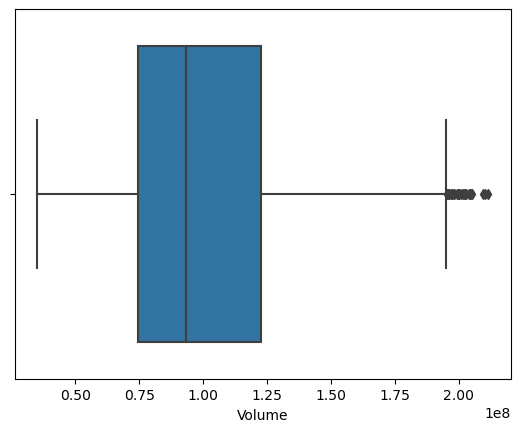

In [41]:
sns.boxplot(x='Volume',data=df)

<AxesSubplot:>

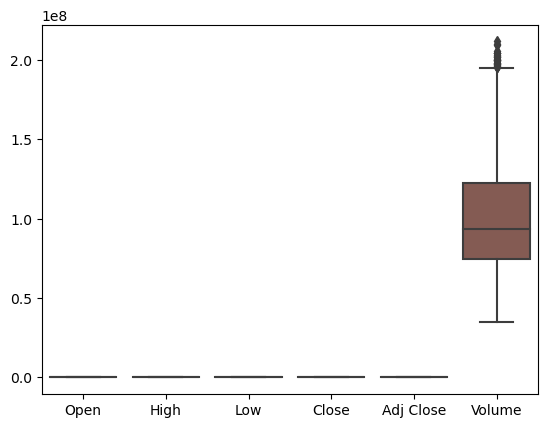

In [42]:
sns.boxplot(data=df)

# Maximum number of outliers are removed ✅ hence we removed almost every possibale outliers : here we are not removing all outliers , because It will distribue the data set corelation s¶
 ✅

In [43]:
# 3.5 Scalling  check :

# Min-max scalling and standardization  using scikit -learn:



#The purpose of using the Min-Max Scaler is to normalize the 'Volume' column values to a specific range. 
#This can be useful in situations where you want to compare or combine features that have different scales.

In [44]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming df is your DataFrame and 'Volume' is the column you want to scale

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df['Volume_scaled_minmax'] = min_max_scaler.fit_transform(df['Volume'].values.reshape(-1, 1))

# Standardization
standard_scaler = StandardScaler()
df['Volume_scaled_standard'] = standard_scaler.fit_transform(df['Volume'].values.reshape(-1, 1))

# Print the scaled DataFrame
print(df[['Volume', 'Volume_scaled_minmax', 'Volume_scaled_standard']])


               Volume  Volume_scaled_minmax  Volume_scaled_standard
Date                                                               
2018-06-01   93770000              0.332242               -0.215561
2018-06-04  105064800              0.396308                0.092320
2018-06-05   86264000              0.289666               -0.420164
2018-06-06   83734400              0.275318               -0.489118
2018-06-07   85388800              0.284702               -0.444021
...               ...                   ...                     ...
2023-05-24   45143500              0.056424               -1.541052
2023-05-25   56058300              0.118335               -1.243530
2023-05-26   54835000              0.111396               -1.276875
2023-05-30   55964400              0.117802               -1.246089
2023-05-31   99625300              0.365454               -0.055954

[1194 rows x 3 columns]


C:\Users\dell\AppData\Local\Temp\ipykernel_11832\1165416033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume_scaled_minmax'] = min_max_scaler.fit_transform(df['Volume'].values.reshape(-1, 1))
C:\Users\dell\AppData\Local\Temp\ipykernel_11832\1165416033.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume_scaled_standard'] = standard_scaler.fit_transform(df['Volume'].values.reshape(-1, 1))


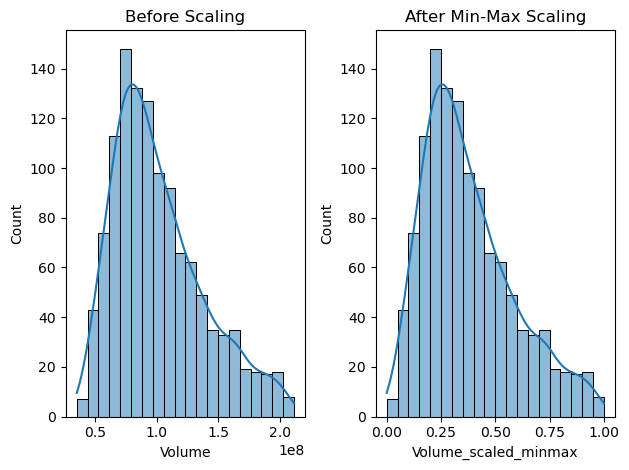

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Volume' is the column you want to scale

# Before Scaling
plt.subplot(1, 2, 1)
sns.histplot(df['Volume'], kde=True)
plt.title('Before Scaling')

# After Min-Max Scaling
plt.subplot(1, 2, 2)
sns.histplot(df['Volume_scaled_minmax'], kde=True)
plt.title('After Min-Max Scaling')

plt.tight_layout()
plt.show()


# Scaling is Completed ✅

# 3.6Categorical Data encoding is  Not neede ✅

In [46]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Volume_scaled_minmax', 'Volume_scaled_standard'],
      dtype='object')

In [47]:
df.head()

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-06-01  46.997501  47.564999  46.937500  47.560001  45.451916   93770000   
2018-06-04  47.910000  48.355000  47.837502  47.957500  45.831799  105064800   
2018-06-05  48.267502  48.485001  48.090000  48.327499  46.185394   86264000   
2018-06-06  48.407501  48.520000  47.980000  48.494999  46.345486   83734400   
2018-06-07  48.535000  48.549999  48.084999  48.365002  46.221245   85388800   

            Volume_scaled_minmax  Volume_scaled_standard  
Date                                                      
2018-06-01              0.332242               -0.215561  
2018-06-04              0.396308                0.092320  
2018-06-05              0.289666               -0.420164  
2018-06-06              0.275318               -0.489118  
2018-06-07              0.284702               -0.444021

In [48]:
df.shape

(1194, 8)

# Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

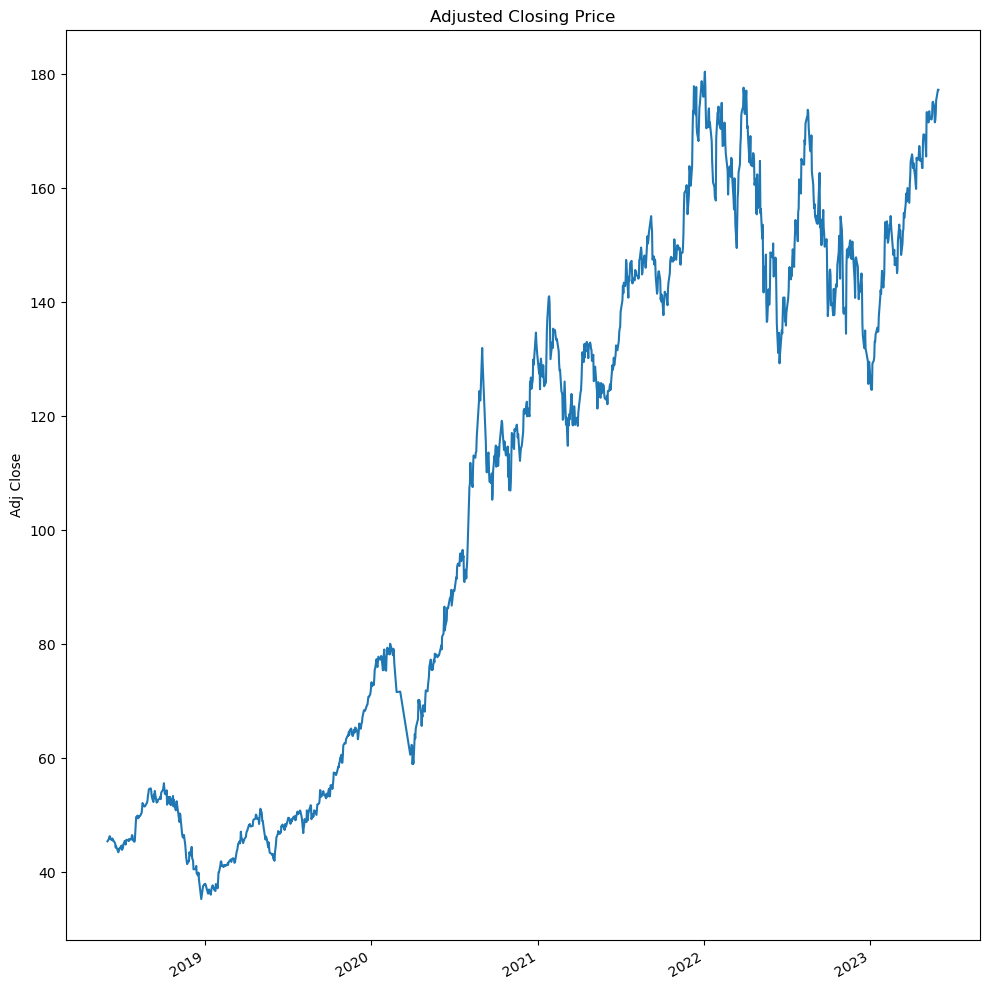

In [49]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(1, 1, 1)
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Adjusted Closing Price")

plt.tight_layout()


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1194 entries, 2018-06-01 to 2023-05-31
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    1194 non-null   float64
 1   High                    1194 non-null   float64
 2   Low                     1194 non-null   float64
 3   Close                   1194 non-null   float64
 4   Adj Close               1194 non-null   float64
 5   Volume                  1194 non-null   int32  
 6   Volume_scaled_minmax    1194 non-null   float64
 7   Volume_scaled_standard  1194 non-null   float64
dtypes: float64(7), int32(1)
memory usage: 79.3 KB


 # Volume of sales 

Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

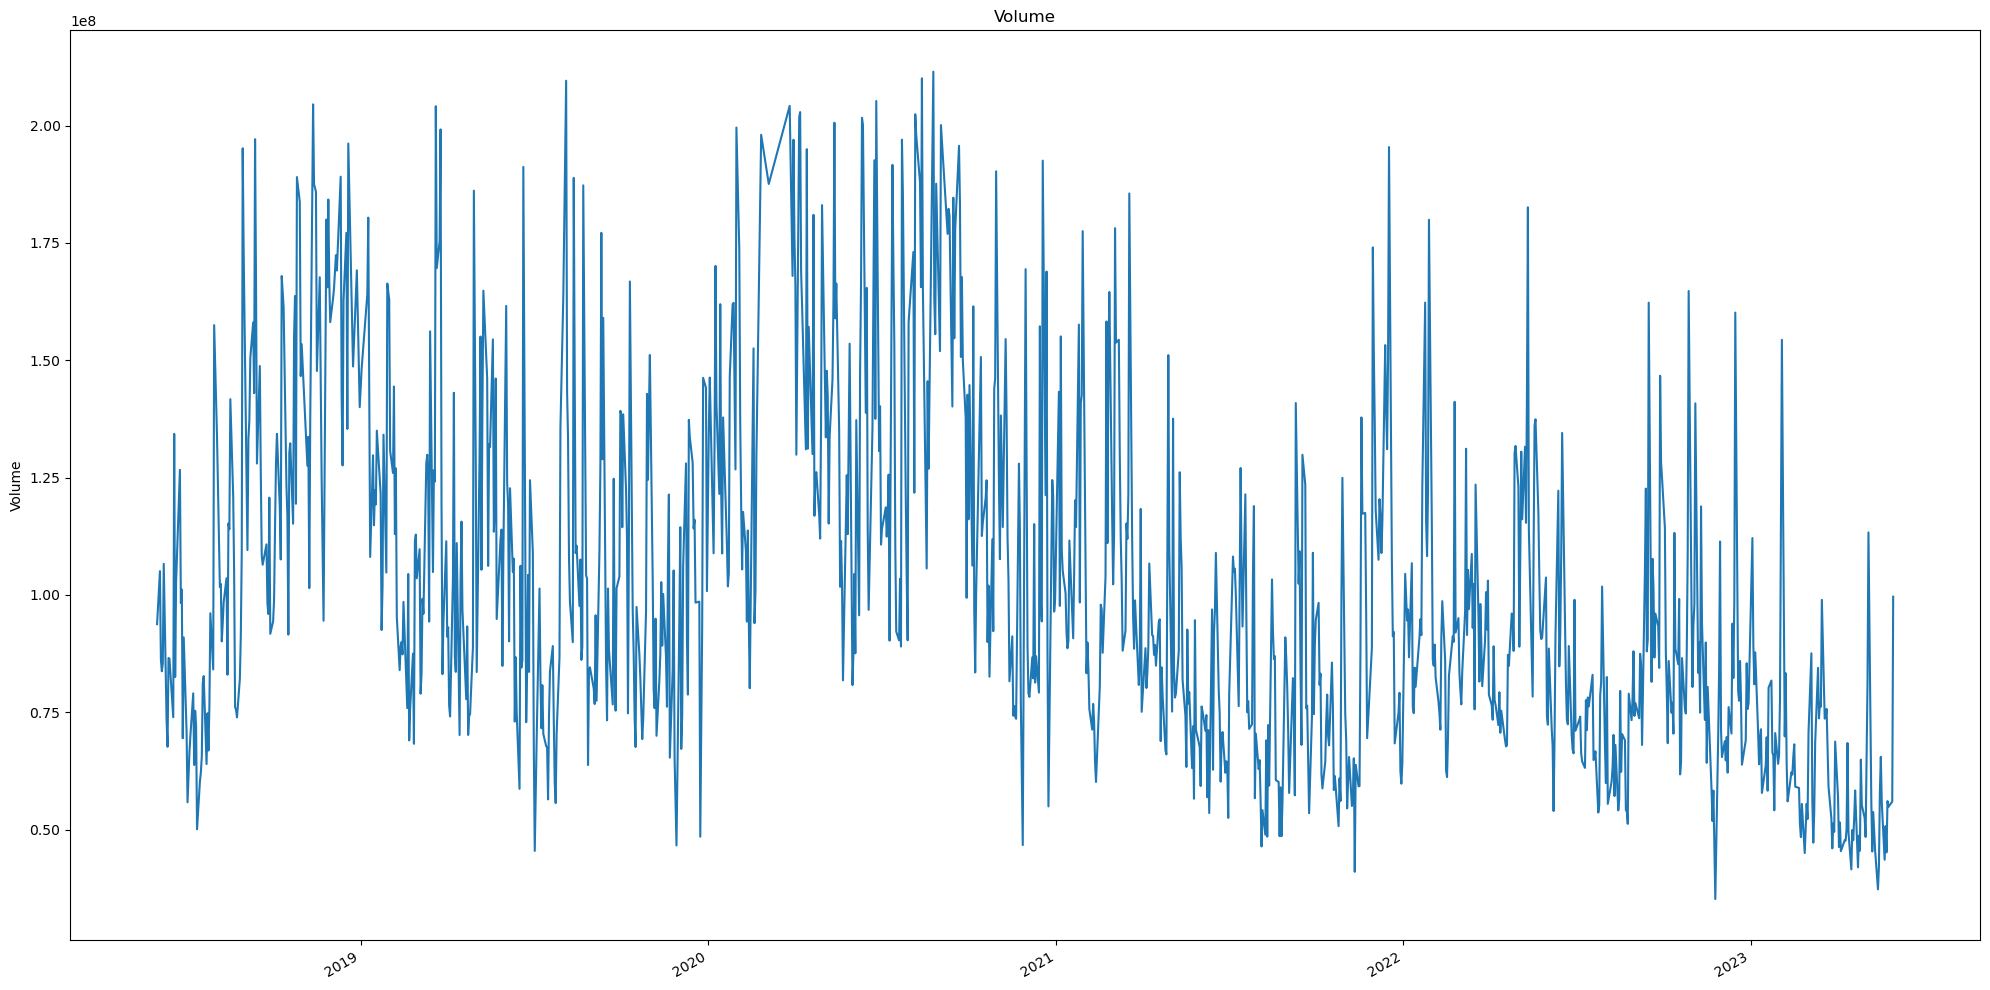

In [51]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(1, 1, 1)
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Volume")

plt.tight_layout()


Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stoc

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

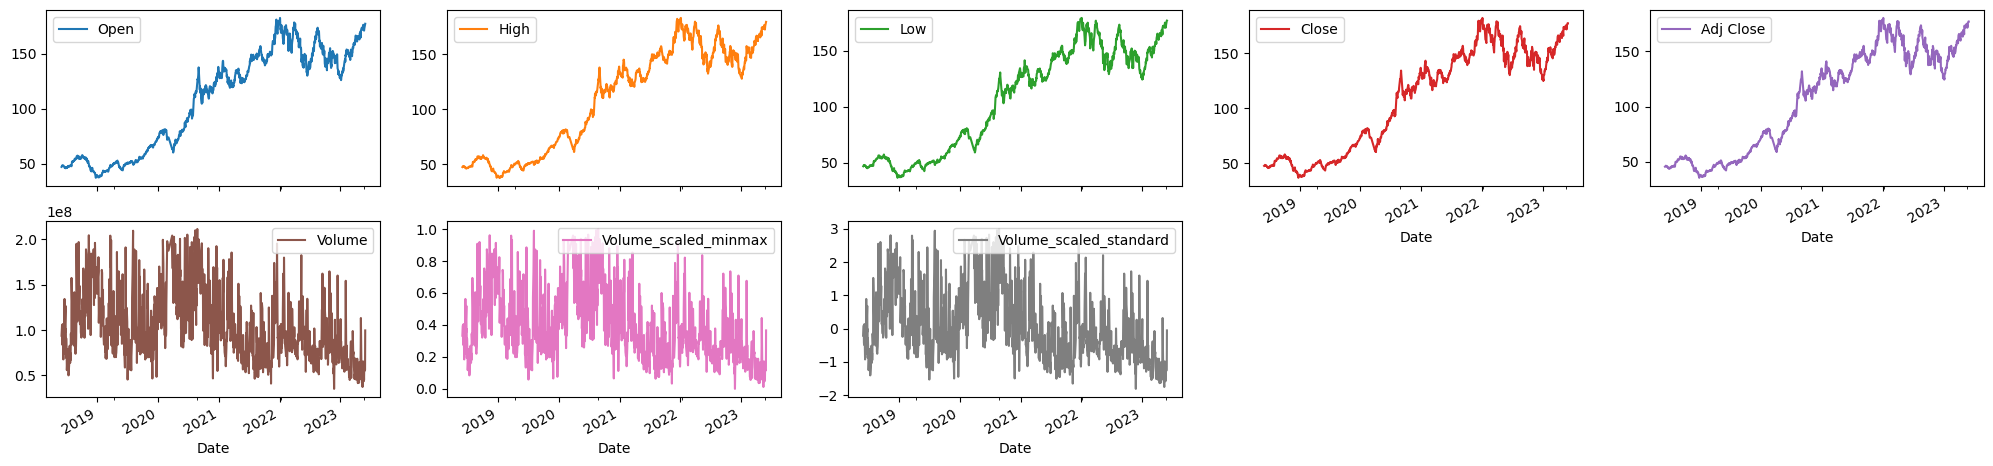

In [52]:
df.plot(kind='line',subplots=True,figsize=(25,15),layout=(5,5),use_index=True)

# 2.What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [53]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Volume_scaled_minmax', 'Volume_scaled_standard'],
      dtype='object')

In [54]:
df.shape

(1194, 8)

C:\Users\dell\AppData\Local\Temp\ipykernel_11832\2956977627.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df['Adj Close'].rolling(ma).mean()
C:\Users\dell\AppData\Local\Temp\ipykernel_11832\2956977627.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df['Adj Close'].rolling(ma).mean()
C:\Users\dell\AppData\Local\Temp\ipykernel_11832\2956977627.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

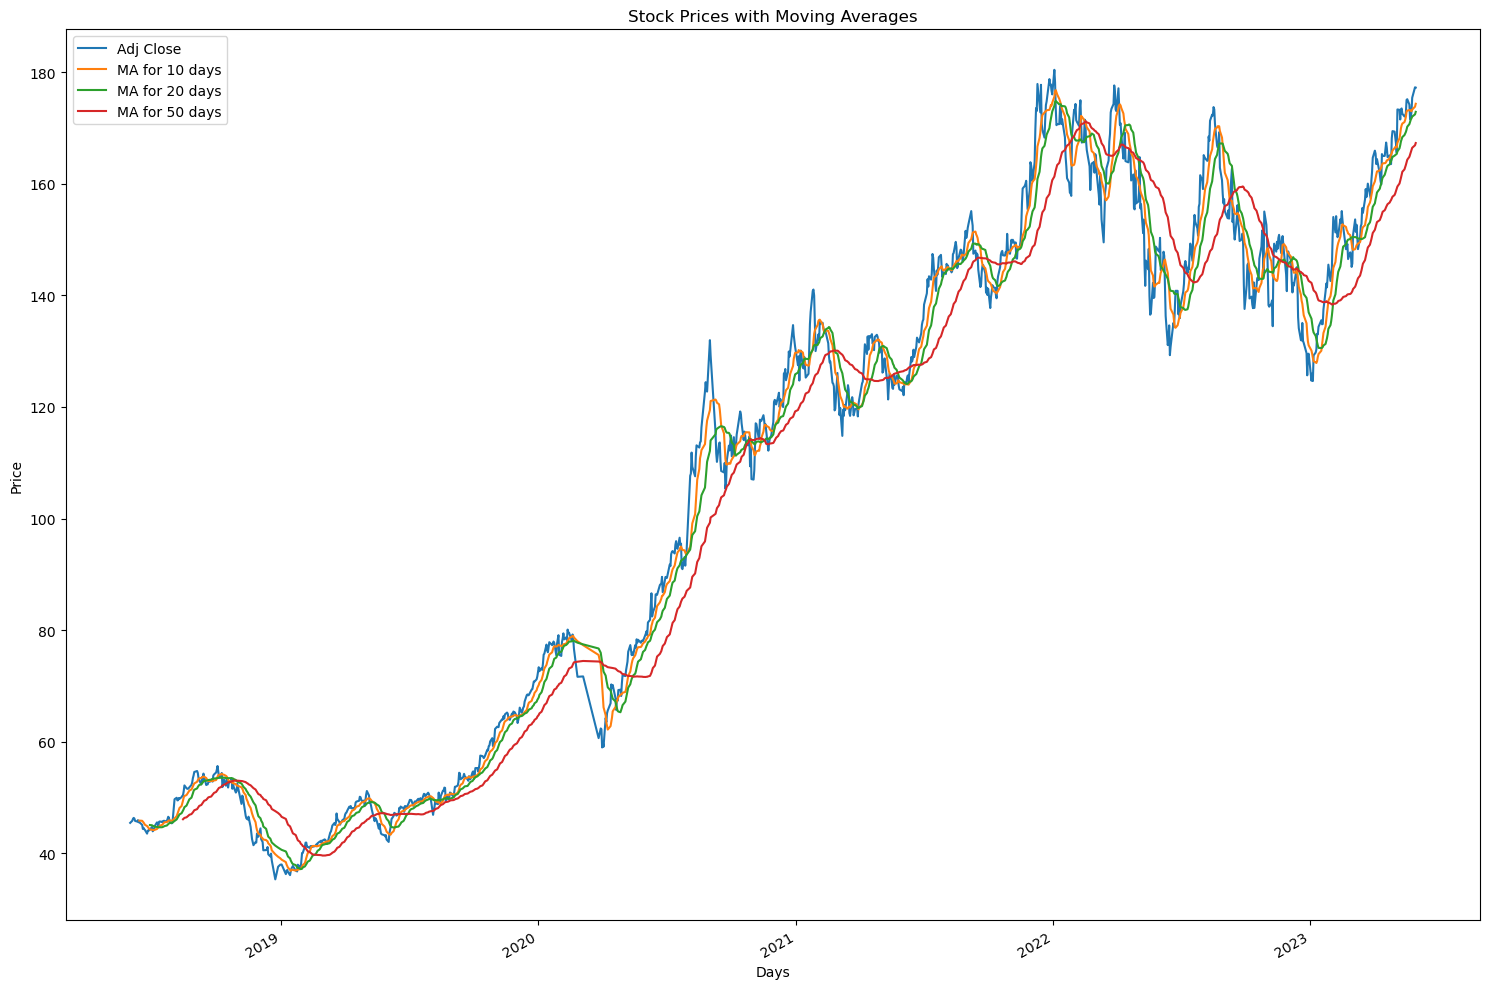

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

ma_day = [10, 20, 50]

# Calculate moving averages for each ma_day
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

# Plotting the data and moving averages
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)

df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('Stock Prices with Moving Averages')
axes.set_xlabel('Days')
axes.set_ylabel('Price')

plt.tight_layout()
plt.show()


# We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.  ✅

In [56]:
df.head(5)

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-06-01  46.997501  47.564999  46.937500  47.560001  45.451916   93770000   
2018-06-04  47.910000  48.355000  47.837502  47.957500  45.831799  105064800   
2018-06-05  48.267502  48.485001  48.090000  48.327499  46.185394   86264000   
2018-06-06  48.407501  48.520000  47.980000  48.494999  46.345486   83734400   
2018-06-07  48.535000  48.549999  48.084999  48.365002  46.221245   85388800   

            Volume_scaled_minmax  Volume_scaled_standard  MA for 10 days  \
Date                                                                       
2018-06-01              0.332242               -0.215561             NaN   
2018-06-04              0.396308                0.092320             NaN   
2018-06-05              0.289666               -0.420164             NaN   
2018-06-06              0.275318               -0.489118             NaN   
2018-06-07              0.284702               -0.444021             NaN   

            MA for 20 days  MA for 50 days  
Date                                        
2018-06-01             NaN             NaN  
2018-06-04             NaN             NaN  
2018-06-05             NaN             NaN  
2018-06-06             NaN             NaN  
2018-06-07             NaN             NaN

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1194 entries, 2018-06-01 to 2023-05-31
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    1194 non-null   float64
 1   High                    1194 non-null   float64
 2   Low                     1194 non-null   float64
 3   Close                   1194 non-null   float64
 4   Adj Close               1194 non-null   float64
 5   Volume                  1194 non-null   int32  
 6   Volume_scaled_minmax    1194 non-null   float64
 7   Volume_scaled_standard  1194 non-null   float64
 8   MA for 10 days          1185 non-null   float64
 9   MA for 20 days          1175 non-null   float64
 10  MA for 50 days          1145 non-null   float64
dtypes: float64(10), int32(1)
memory usage: 107.3 KB


In [58]:
df.corr().head(5)

Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999697  0.999636  0.999186   0.999132 -0.386365   
High       0.999697  1.000000  0.999603  0.999633   0.999585 -0.380712   
Low        0.999636  0.999603  1.000000  0.999652   0.999607 -0.395216   
Close      0.999186  0.999633  0.999652  1.000000   0.999951 -0.388560   
Adj Close  0.999132  0.999585  0.999607  0.999951   1.000000 -0.390885   

           Volume_scaled_minmax  Volume_scaled_standard  MA for 10 days  \
Open                  -0.386365               -0.386365        0.997183   
High                  -0.380712               -0.380712        0.997245   
Low                   -0.395216               -0.395216        0.996763   
Close                 -0.388560               -0.388560        0.996662   
Adj Close             -0.390885               -0.390885        0.996815   

           MA for 20 days  MA for 50 days  
Open             0.993465        0.982130  
High             0.993713        0.982836  
Low              0.992770        0.981273  
Close            0.992863        0.981797  
Adj Close        0.993126        0.982387

<AxesSubplot:title={'center':'Correlation matrix'}>

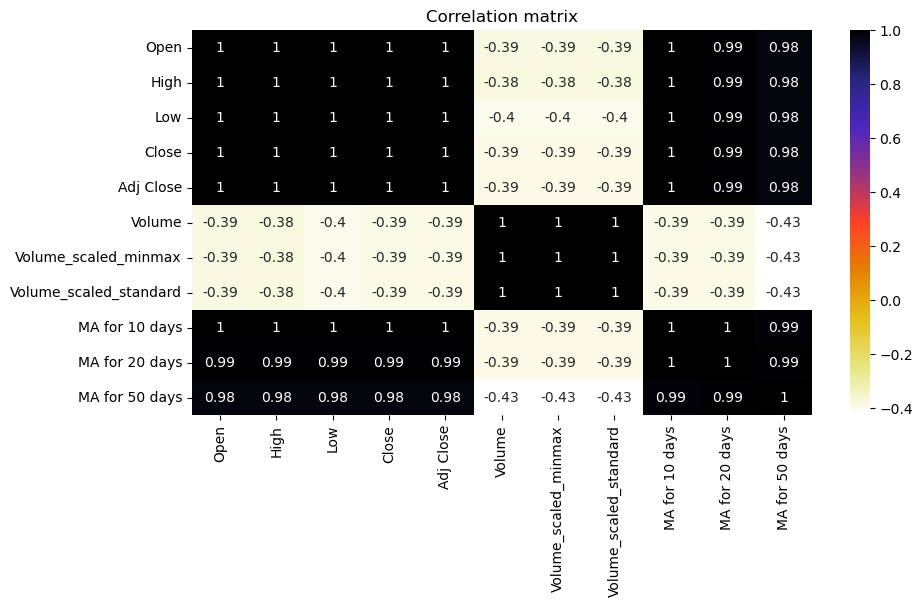

In [59]:
plt.subplots(figsize=(10,5))
plt.title("Correlation matrix")
sns.heatmap(data=df.corr(),cmap="CMRmap_r",annot=True)


In [60]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Volume_scaled_minmax', 'Volume_scaled_standard', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')

# 3. What was the daily return of the stock on average?
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

C:\Users\dell\AppData\Local\Temp\ipykernel_11832\1624026583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Daily return']=df['Adj Close'].pct_change()    # pct_chnage   function to calculate the percentage change for each day in the 'Adj Close' column, representing the daily return.
C:\Users\dell\AppData\Local\Temp\ipykernel_11832\1624026583.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x * 100) for x in axes.get_yticks()])


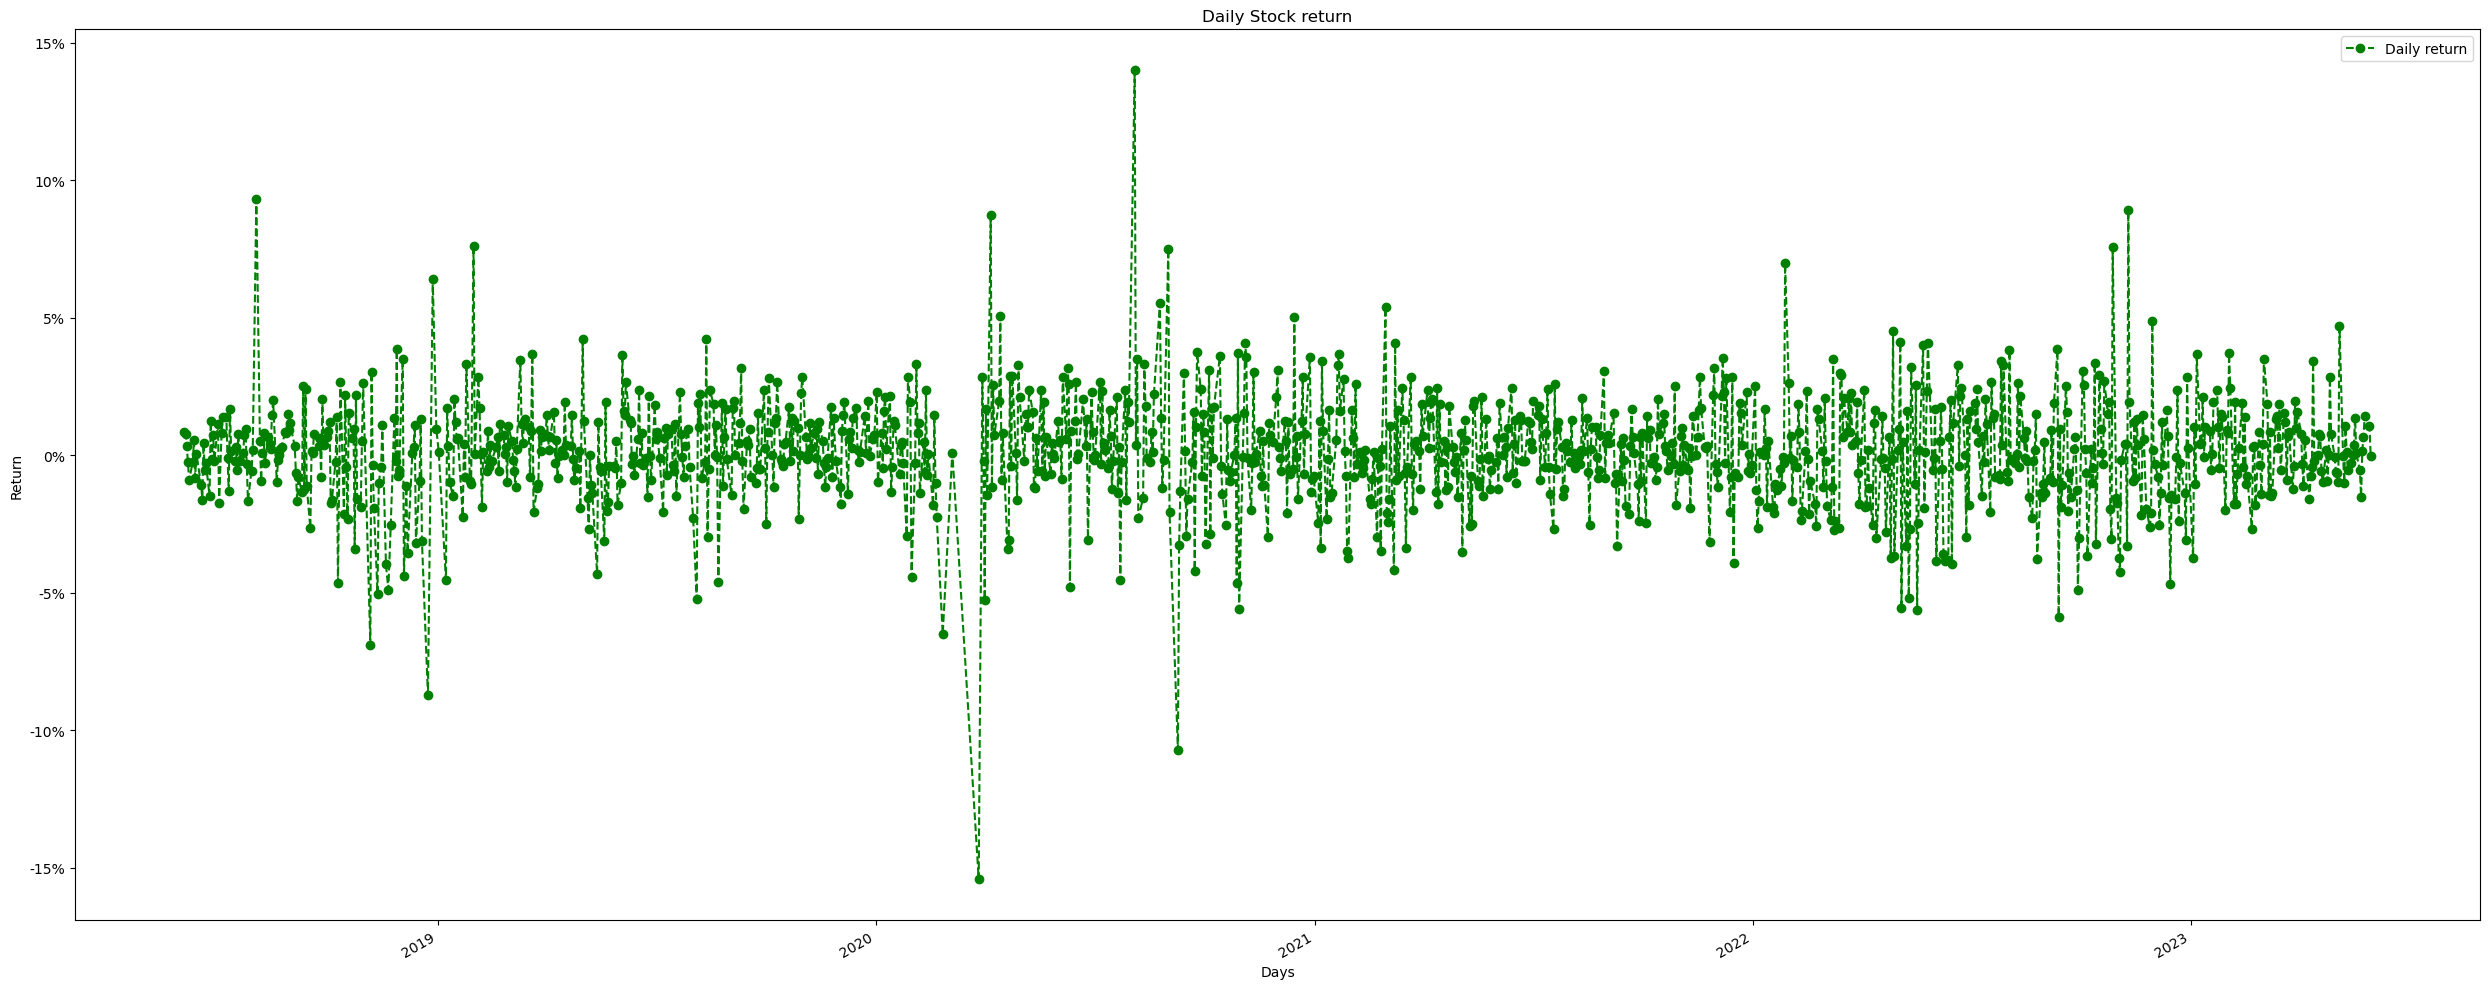

In [61]:
# calcutale the daily return for each day !


df['Daily return']=df['Adj Close'].pct_change()    # pct_chnage   function to calculate the percentage change for each day in the 'Adj Close' column, representing the daily return.


# Ploting the daily return percentage

fig,axes=plt.subplots(nrows=1,ncols=1)
fig.set_figheight(10)
fig.set_figwidth(25)
fig.patch.set_facecolor('w')

df['Daily return'].plot(ax=axes,legend=True,linestyle='--',marker='o',color='green')
axes.set_title("Daily Stock return")
axes.set_xlabel("Days")
axes.set_ylabel("Return")

# Set the y-axis tick labels as percentages
axes.set_yticklabels(['{:.0f}%'.format(x * 100) for x in axes.get_yticks()])

plt.tight_layout()
plt.legend()
plt.show()

 Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

plt.figure(figsize=(10,8))
 

df['Daily return'].hist(bins=50,color="Green")
plt.xlabel("Daily Return")
plt.ylabel("counts")

In [62]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Volume_scaled_minmax', 'Volume_scaled_standard', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days', 'Daily return'],
      dtype='object')

# EDA:


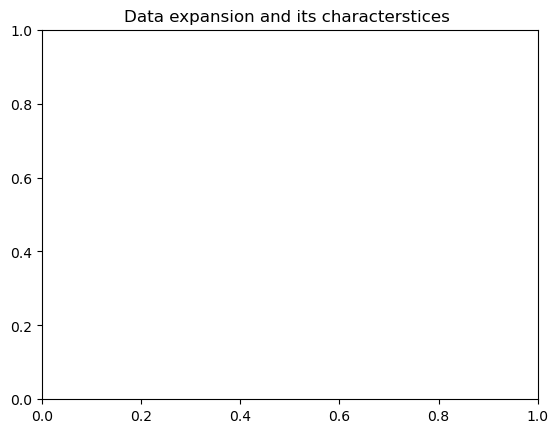

<Figure size 1000x1000 with 0 Axes>

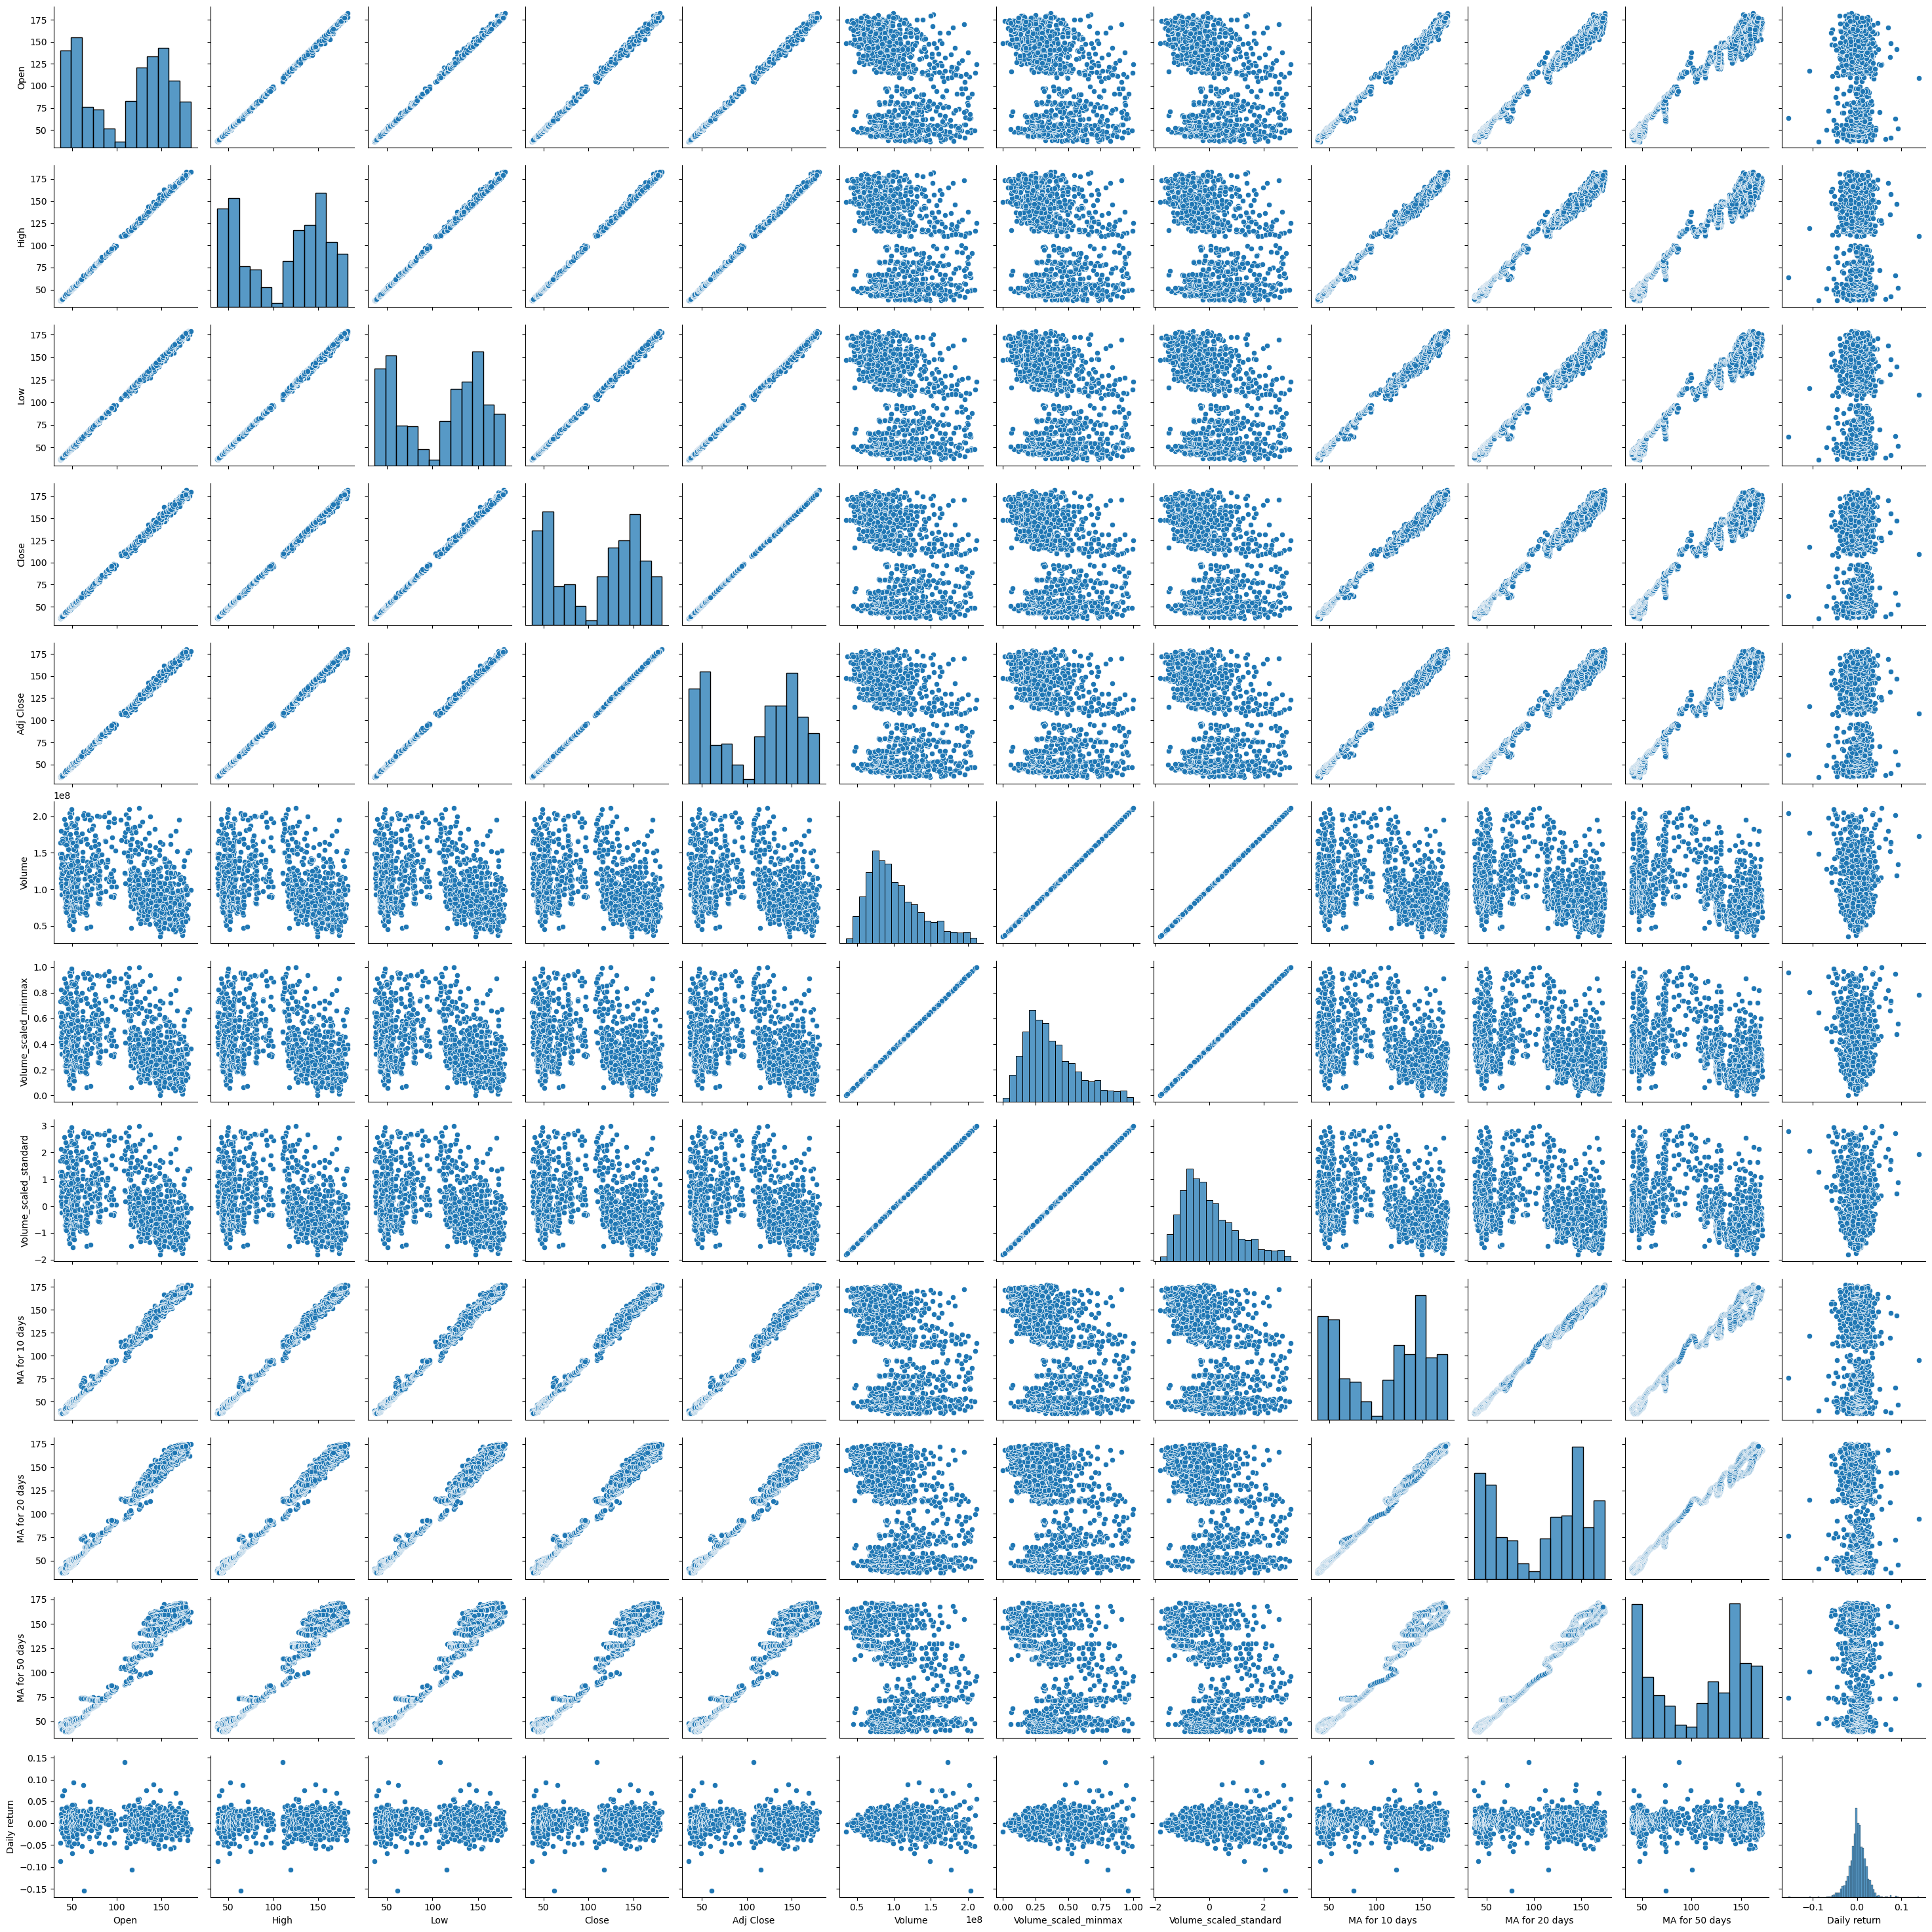

In [63]:
plt.title("Data expansion and its characterstices ")
plt.figure(figsize=(10,10))
sns.pairplot(df)

# How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

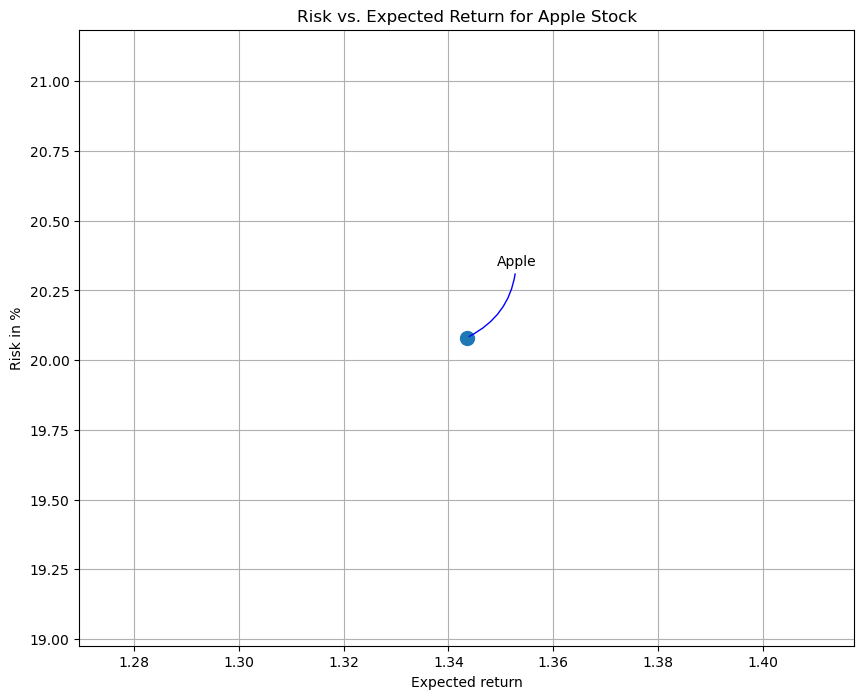

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the daily returns for Apple stock
rets = df['Daily return'].dropna()

# convert returns to percentag 
rets=rets*1000

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=100)
plt.xlabel('Expected return')
plt.ylabel('Risk in %')



plt.annotate('Apple', xy=(rets.mean(), rets.std()), xytext=(50, 50), textcoords='offset points',
             ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.grid(True)
plt.title('Risk vs. Expected Return for Apple Stock')
plt.show()


# Predicting the closing price stock price of APPLE inc:

In [65]:
df.head(5)

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-06-01  46.997501  47.564999  46.937500  47.560001  45.451916   93770000   
2018-06-04  47.910000  48.355000  47.837502  47.957500  45.831799  105064800   
2018-06-05  48.267502  48.485001  48.090000  48.327499  46.185394   86264000   
2018-06-06  48.407501  48.520000  47.980000  48.494999  46.345486   83734400   
2018-06-07  48.535000  48.549999  48.084999  48.365002  46.221245   85388800   

            Volume_scaled_minmax  Volume_scaled_standard  MA for 10 days  \
Date                                                                       
2018-06-01              0.332242               -0.215561             NaN   
2018-06-04              0.396308                0.092320             NaN   
2018-06-05              0.289666               -0.420164             NaN   
2018-06-06              0.275318               -0.489118             NaN   
2018-06-07              0.284702               -0.444021             NaN   

            MA for 20 days  MA for 50 days  Daily return  
Date                                                      
2018-06-01             NaN             NaN           NaN  
2018-06-04             NaN             NaN      0.008358  
2018-06-05             NaN             NaN      0.007715  
2018-06-06             NaN             NaN      0.003466  
2018-06-07             NaN             NaN     -0.002681

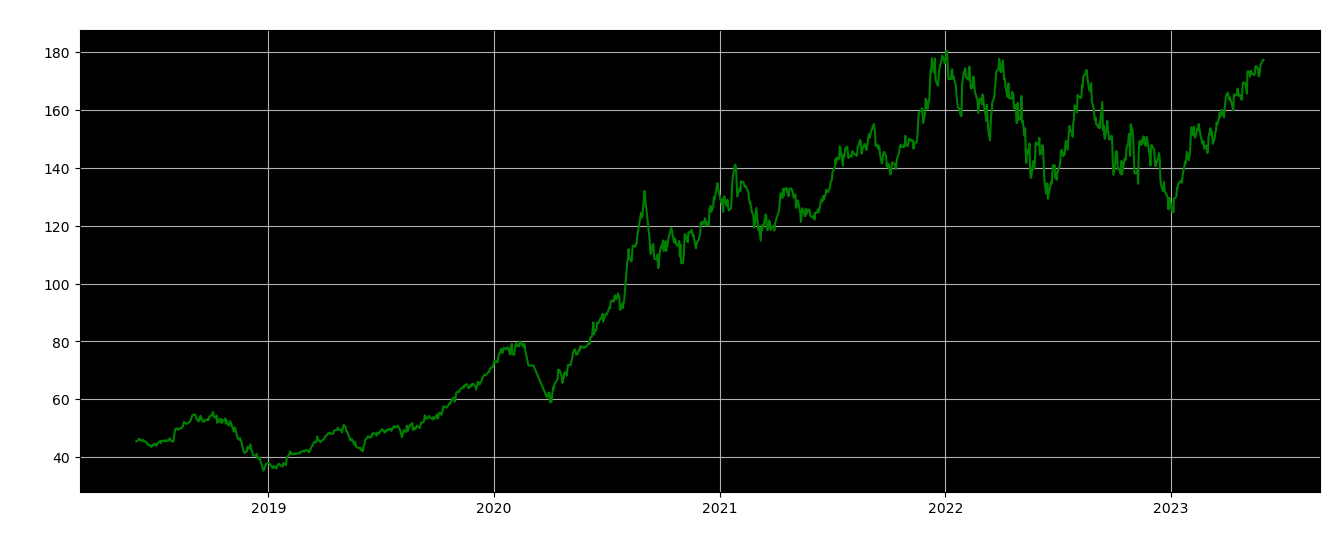

In [66]:
plt.figure(figsize=(16,6))
plt.title(" ADJ Clsoing price history",color='white')
plt.plot(df['Adj Close'],color="green")

plt.xlabel("year",fontsize=20,color='white')

plt.grid(True)
plt.ylabel(" adj Closing price USD",fontsize=20,color="white")

plt.gca().set_facecolor('black')
plt.show()


In [67]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Volume_scaled_minmax', 'Volume_scaled_standard', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days', 'Daily return'],
      dtype='object')

In [68]:
# create a new datafrmae with only the "Adj Close"

In [69]:
# Create a new dataframe with only the 'ADj Close column 
data = df.filter(['Adj Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1135

In [70]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06977978],
       [0.07239772],
       [0.07483449],
       ...,
       [0.96551335],
       [0.97840038],
       [0.97805579]])

In [71]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.06977978, 0.07239772, 0.07483449, 0.07593775, 0.07508155,
       0.07218365, 0.07140984, 0.07313856, 0.07053716, 0.07070183,
       0.06731012, 0.06228827, 0.06362192, 0.06190958, 0.06102045,
       0.05649264, 0.06021375, 0.05976911, 0.06197536, 0.06133328,
       0.06474153, 0.05937401, 0.06181082, 0.06604224, 0.0703396 ,
       0.06996097, 0.06589403, 0.07108044, 0.07157443, 0.07088294,
       0.07177205, 0.07004322, 0.07248005, 0.07175572, 0.07203549,
       0.07432418, 0.07732077, 0.07631636, 0.07099816, 0.0692365 ,
       0.06986209, 0.09900502, 0.10078318, 0.09755612, 0.09778662,
       0.10047038, 0.09944598, 0.10165999, 0.10311402, 0.10392368,
       0.10901265, 0.11605126, 0.11254847, 0.11185445, 0.11187104,
       0.112598  , 0.11370502, 0.11664612, 0.11955401, 0.1249735 ])]
[0.12836059070984782]

[array([0.06977978, 0.07239772, 0.07483449, 0.07593775, 0.07508155,
       0.07218365, 0.07140984, 0.07313856, 0.07053716, 0.07070183,
       0.06731012, 0.06228827, 0.06

# Tenserflow and Keras:

In [72]:
#pip install tensorflow


  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached jax-0.4.13-py3-none-any.whl
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.56.0-cp39-cp39-win_amd64.whl (4.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
  Using cached google_auth-2.20.0-py2.py3-none-any.whl (181 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restar

In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1075/1075 [==============================] - 30s 25ms/step - loss: 0.0030


In [75]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 32ms/step


9.878319182731099

C:\Users\dell\AppData\Local\Temp\ipykernel_11832\3022950025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


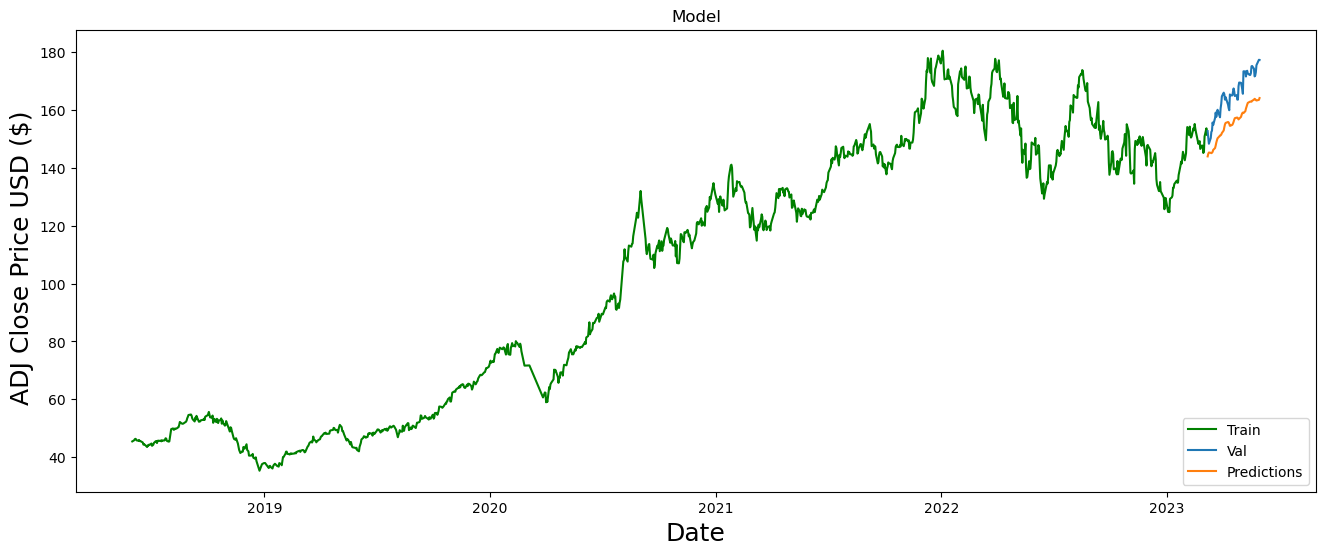

In [82]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel(' ADJ Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'],color='green')
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [79]:
 #Show the valid and predicted prices
valid

Adj Close  Predictions
Date                               
2023-03-08  152.658844   143.924866
2023-03-09  150.381989   144.815002
2023-03-10  148.294876   145.261780
2023-03-13  150.262161   145.158981
2023-03-14  152.379227   145.044830
2023-03-15  152.778687   145.190155
2023-03-16  155.634735   145.481766
2023-03-17  154.785904   146.163803
2023-03-20  157.182587   146.816467
2023-03-21  159.059982   147.665390
2023-03-22  157.612000   148.705719
2023-03-23  158.710464   149.488449
2023-03-24  160.028656   150.168823
2023-03-27  158.061371   150.849945
2023-03-28  157.432236   151.168030
2023-03-29  160.547943   151.188095
2023-03-30  162.135742   151.453400
2023-03-31  164.672226   151.985168
2023-04-03  165.940475   152.888885
2023-04-04  165.401230   153.992905
2023-04-05  163.533798   154.957123
2023-04-06  164.432556   155.472015
2023-04-10  161.806183   155.809250
2023-04-11  160.577896   155.664841
2023-04-12  159.878860   155.166275
2023-04-13  165.331314   154.488922
2023-04-14  164.981812   154.527313
2023-04-17  165.001770   154.847717
2023-04-18  166.240067   155.280838
2023-04-19  167.398468   155.870102
2023-04-20  166.419800   156.591354
2023-04-21  164.792068   157.139114
2023-04-24  165.101639   157.317184
2023-04-25  163.543793   157.332245
2023-04-26  163.533798   157.061493
2023-04-27  168.177383   156.700089
2023-04-28  169.445618   156.939911
2023-05-01  169.355743   157.577942
2023-05-02  168.307190   158.306107
2023-05-03  167.218704   158.838760
2023-05-04  165.560989   159.060440
2023-05-05  173.330261   158.887009
2023-05-08  173.260345   159.540146
2023-05-09  171.532745   160.440903
2023-05-10  173.320267   161.114059
2023-05-11  173.510010   161.810226
2023-05-12  172.570007   162.417740
2023-05-15  172.070007   162.764618
2023-05-16  172.070007   162.869705
2023-05-17  172.690002   162.840454
2023-05-18  175.050003   162.828445
2023-05-19  175.160004   163.125977
2023-05-22  174.199997   163.533463
2023-05-23  171.559998   163.816315
2023-05-24  171.839996   163.668411
2023-05-25  172.990005   163.386765
2023-05-26  175.429993   163.227127
2023-05-30  177.300003   163.459473
2023-05-31  177.250000   164.077881

In [80]:
valid.shape

(59, 2)

# Conclusion :